<a href="https://www.kaggle.com/code/metin2/makine-renmesi-konut-fiyat-tahminlemesi?scriptVersionId=194410517" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Data Cleaning

GitHub: [Link](https://github.com/m-karakus/veri-bilimi-kursu/tree/main/banglore_ev_fiyatlari)  
Veri Seti: [Link](https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data/versions/2)  

In [1]:
# paketleri import edelim
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# verileri pandas dataframe ine aktaralım...
df = pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')


In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00,1.00,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00,3.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00,3.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00,1.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00,1.00,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
# gereksiz kolonları temizle
df = df.drop(['area_type','availability','society'],axis='columns')
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.00,1.00,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.00,3.00,120.00
2,Uttarahalli,3 BHK,1440,2.00,3.00,62.00
3,Lingadheeranahalli,3 BHK,1521,3.00,1.00,95.00
4,Kothanur,2 BHK,1200,2.00,1.00,51.00


In [7]:
df.shape

(13320, 6)

In [8]:
# Null degerleri belirle ve gerekli işlemleri yap
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df = df.dropna()
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df.shape

(12710, 6)

In [11]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.00,1.00,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.00,3.00,120.00
2,Uttarahalli,3 BHK,1440,2.00,3.00,62.00
3,Lingadheeranahalli,3 BHK,1521,3.00,1.00,95.00
4,Kothanur,2 BHK,1200,2.00,1.00,51.00


In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [13]:
int('3 BHK'.split(' ')[0])

3

In [14]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13314        3 BHK
13315    5 Bedroom
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 12710, dtype: object

In [15]:
df['size'].apply(lambda x: int(x.split(' ')[0]))

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13317    2
13318    4
13319    1
Name: size, Length: 12710, dtype: int64

In [16]:
df['oda'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
df.head()

,location,size,total_sqft,bath,balcony,price,oda
0,Electronic City Phase II,2 BHK,1056,2.00,1.00,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.00,3.00,120.00,4
2,Uttarahalli,3 BHK,1440,2.00,3.00,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.00,1.00,95.00,3
4,Kothanur,2 BHK,1200,2.00,1.00,51.00,2


In [18]:
df.shape

(12710, 7)

In [19]:
df = df.drop(['size'],axis='columns')
df.head()

,location,total_sqft,bath,balcony,price,oda
0,Electronic City Phase II,1056,2.00,1.00,39.07,2
1,Chikka Tirupathi,2600,5.00,3.00,120.00,4
2,Uttarahalli,1440,2.00,3.00,62.00,3
3,Lingadheeranahalli,1521,3.00,1.00,95.00,3
4,Kothanur,1200,2.00,1.00,51.00,2


In [20]:
df.oda.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [21]:
df[df.oda>20]

,location,total_sqft,bath,balcony,price,oda
1718,2Electronic City Phase II,8000,27.00,0.00,230.00,27
4684,Munnekollal,2400,40.00,0.00,660.00,43


In [22]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def sayi_mi(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df[~df['total_sqft'].apply(sayi_mi)]

,location,total_sqft,bath,balcony,price,oda
30,Yelahanka,2100 - 2850,4.00,0.00,186.00,4
122,Hebbal,3067 - 8156,4.00,0.00,477.00,4
137,8th Phase JP Nagar,1042 - 1105,2.00,0.00,54.01,2
165,Sarjapur,1145 - 1340,2.00,0.00,43.49,2
188,KR Puram,1015 - 1540,2.00,0.00,56.80,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.00,0.00,38.19,2
12990,Talaghattapura,1804 - 2273,3.00,0.00,122.00,3
13059,Harlur,1200 - 1470,2.00,0.00,72.76,2
13265,Hoodi,1133 - 1384,2.00,0.00,59.13,2


In [25]:
df2 =  df[df['total_sqft'].apply(sayi_mi)==False]
df2.head()

,location,total_sqft,bath,balcony,price,oda
30,Yelahanka,2100 - 2850,4.00,0.00,186.00,4
122,Hebbal,3067 - 8156,4.00,0.00,477.00,4
137,8th Phase JP Nagar,1042 - 1105,2.00,0.00,54.01,2
165,Sarjapur,1145 - 1340,2.00,0.00,43.49,2
188,KR Puram,1015 - 1540,2.00,0.00,56.80,2


In [26]:
df2['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '1120 - 1145',
       '3090 - 5002', '1160 - 1195', '1000Sq. Meter', '1115 - 1130',
       '520 - 645', '1000 - 1285', '650 - 665', '633 - 666', '5.31Acres',
       '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093',
       '716Sq. Meter', '547.34 - 827.31', '580 - 650', '3425 - 3435',
       '1804 - 2273', '3630 - 3800', '4000 - 5249', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '1250 - 1305', '670 - 980',
       '1005.03 - 1252.49', '1004 - 1204', '645 - 936', '2710 - 3360',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '980 - 1030', '2249.81 - 4112.19',
       '1070 - 1315', '3040Sq. Meter', '500Sq. Yards', '2806 - 3019',
       '613 - 648', '704 - 730', '1210 - 1477', '3369 - 3464',
       '1125 - 1500', '167Sq. Meter', '1076 - 1199', '381 - 535',
       '524 - 894', '540 - 670', '2725 - 3

In [27]:
df2[df2['total_sqft'].str.contains("Meter")]

,location,total_sqft,bath,balcony,price,oda
410,Kengeri,34.46Sq. Meter,1.00,0.00,18.50,1
775,Basavanagara,1000Sq. Meter,2.00,1.00,93.00,1
1400,Chamrajpet,716Sq. Meter,9.00,1.00,296.00,9
1712,Singena Agrahara,1500Sq. Meter,3.00,1.00,95.00,3
1743,Hosa Road,142.61Sq. Meter,3.00,1.00,115.00,3
3228,Dodda Banaswadi,3040Sq. Meter,5.00,1.00,140.00,5
4113,BTM Layout,167Sq. Meter,3.00,2.00,10.00,3
5631,Thanisandra,204Sq. Meter,4.00,2.00,185.00,3
5976,1st Phase JP Nagar,78.03Sq. Meter,1.00,1.00,63.00,1
6303,JP Nagar,84.53Sq. Meter,3.00,1.00,69.34,3


In [28]:
df.shape

(12710, 6)

In [29]:
17/12710

0.0013375295043273013

In [30]:
def convert_range_to_num(x):
    tokens = str(x).split('-')
    if len(tokens) == 2:
        res = (float(tokens[0]) + float(tokens[1])) / 2
    else:
        try:
            res = float(x)
        except:
            res = None
    return res

In [31]:
x= '167Sq. Meter'
x= '12'
x= '10 - 20'
convert_range_to_num(x)

15.0

In [32]:
convert_range_to_num('100 - 200')
# float('   1.32  ')

150.0

In [33]:
df['total_sqft'] = df['total_sqft'].apply(convert_range_to_num)

In [34]:
df['total_sqft'].isna().sum()

42

In [35]:
df = df.dropna()

In [36]:
df.isna().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
oda           0
dtype: int64

In [37]:
df.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [38]:
df.head()

,location,total_sqft,bath,balcony,price,oda
0,Electronic City Phase II,1056.00,2.00,1.00,39.07,2
1,Chikka Tirupathi,2600.00,5.00,3.00,120.00,4
2,Uttarahalli,1440.00,2.00,3.00,62.00,3
3,Lingadheeranahalli,1521.00,3.00,1.00,95.00,3
4,Kothanur,1200.00,2.00,1.00,51.00,2


# Feature Engineering

In [39]:
df

,location,total_sqft,bath,balcony,price,oda
0,Electronic City Phase II,1056.00,2.00,1.00,39.07,2
1,Chikka Tirupathi,2600.00,5.00,3.00,120.00,4
2,Uttarahalli,1440.00,2.00,3.00,62.00,3
3,Lingadheeranahalli,1521.00,3.00,1.00,95.00,3
4,Kothanur,1200.00,2.00,1.00,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.00,3.00,3.00,112.00,3
13315,Whitefield,3453.00,4.00,0.00,231.00,5
13317,Raja Rajeshwari Nagar,1141.00,2.00,1.00,60.00,2
13318,Padmanabhanagar,4689.00,4.00,1.00,488.00,4


![image](https://i.imgur.com/5hmuzns.png)

In [40]:
df['total_sqft']

0       1056.00
1       2600.00
2       1440.00
3       1521.00
4       1200.00
          ...  
13314   1715.00
13315   3453.00
13317   1141.00
13318   4689.00
13319    550.00
Name: total_sqft, Length: 12668, dtype: float64

In [41]:
df['metrekare'] = df['total_sqft'] * 0.092903

In [42]:
df

,location,total_sqft,bath,balcony,price,oda,metrekare
0,Electronic City Phase II,1056.00,2.00,1.00,39.07,2,98.11
1,Chikka Tirupathi,2600.00,5.00,3.00,120.00,4,241.55
2,Uttarahalli,1440.00,2.00,3.00,62.00,3,133.78
3,Lingadheeranahalli,1521.00,3.00,1.00,95.00,3,141.31
4,Kothanur,1200.00,2.00,1.00,51.00,2,111.48
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.00,3.00,3.00,112.00,3,159.33
13315,Whitefield,3453.00,4.00,0.00,231.00,5,320.79
13317,Raja Rajeshwari Nagar,1141.00,2.00,1.00,60.00,2,106.00
13318,Padmanabhanagar,4689.00,4.00,1.00,488.00,4,435.62


In [43]:
df['price_per_m2'] = df['price'] * 1_000 / df['metrekare']

In [44]:
df

,location,total_sqft,bath,balcony,price,oda,metrekare,price_per_m2
0,Electronic City Phase II,1056.00,2.00,1.00,39.07,2,98.11,398.24
1,Chikka Tirupathi,2600.00,5.00,3.00,120.00,4,241.55,496.80
2,Uttarahalli,1440.00,2.00,3.00,62.00,3,133.78,463.45
3,Lingadheeranahalli,1521.00,3.00,1.00,95.00,3,141.31,672.30
4,Kothanur,1200.00,2.00,1.00,51.00,2,111.48,457.47
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.00,3.00,3.00,112.00,3,159.33,702.95
13315,Whitefield,3453.00,4.00,0.00,231.00,5,320.79,720.09
13317,Raja Rajeshwari Nagar,1141.00,2.00,1.00,60.00,2,106.00,566.03
13318,Padmanabhanagar,4689.00,4.00,1.00,488.00,4,435.62,1120.24


In [45]:
len(df.location.unique())

1259

In [46]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [47]:
df.location = df.location.apply(lambda x: x.strip())

In [48]:
loc_stats = df.groupby(['location'])['location'].size().reset_index(name='counts').sort_values(by=['counts'],ascending=False)
loc_stats

,location,counts
1195,Whitefield,514
988,Sarjapur Road,372
388,Electronic City,302
630,Kanakpura Road,259
1094,Thanisandra,233
...,...,...
1,1 Giri Nagar,1
625,Kanakapura Rod,1
626,Kanakapura Main Road,1
627,Kanakapura Road,1


In [49]:
loc_stats

,location,counts
1195,Whitefield,514
988,Sarjapur Road,372
388,Electronic City,302
630,Kanakpura Road,259
1094,Thanisandra,233
...,...,...
1,1 Giri Nagar,1
625,Kanakapura Rod,1
626,Kanakapura Main Road,1
627,Kanakapura Road,1


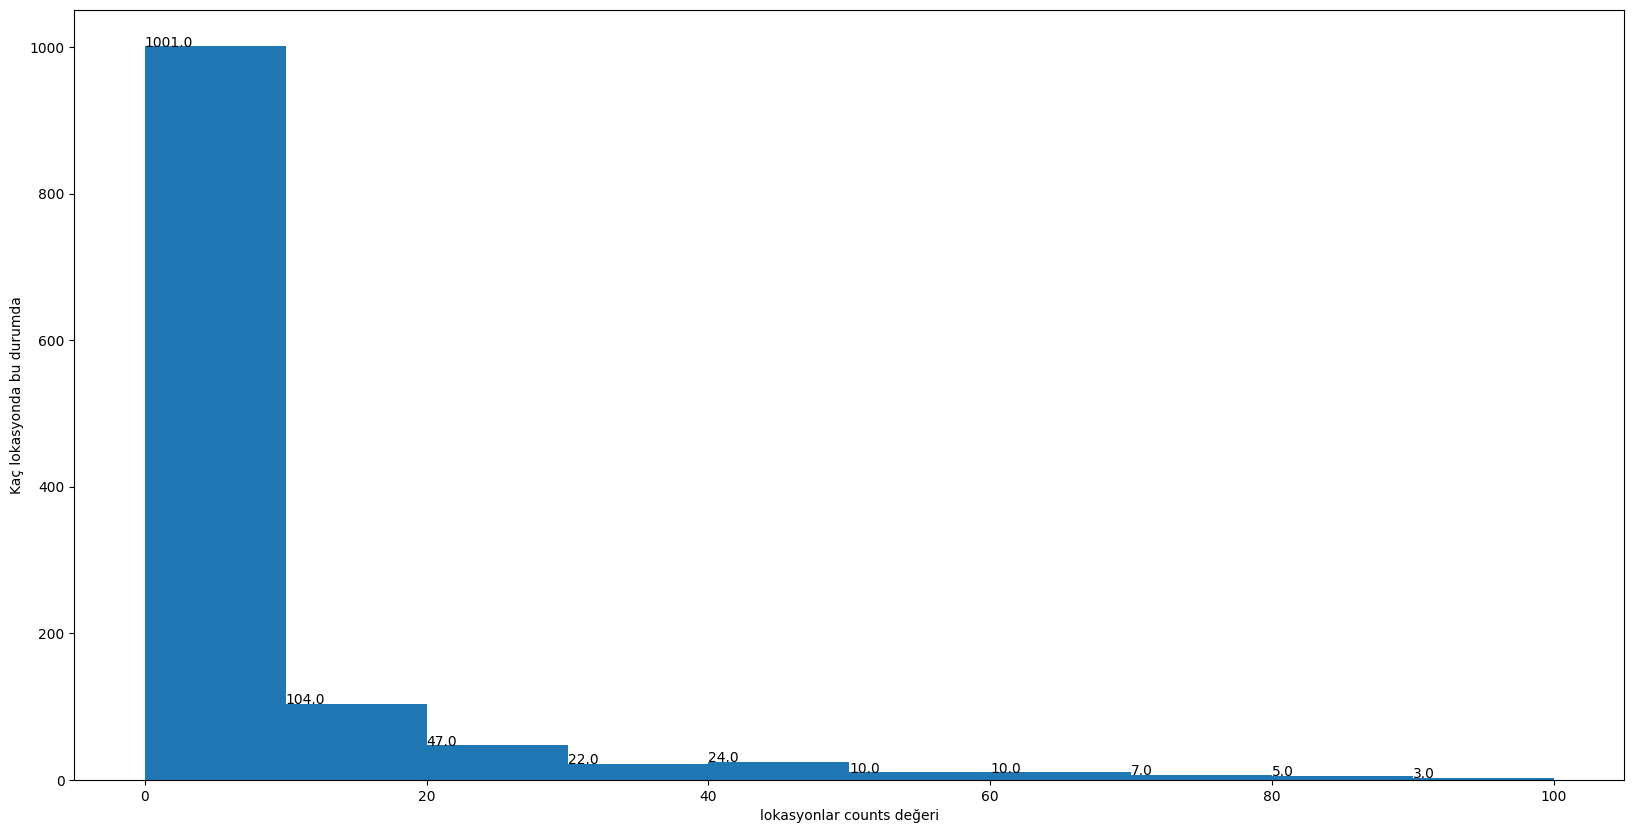

In [50]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

plt.xlabel("lokasyonlar counts değeri")
plt.ylabel("Kaç lokasyonda bu durumda")

bins = 10
data = loc_stats.counts
arr = plt.hist(data, bins=bins, range=(0,100))
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

In [51]:
df.groupby(['location'])['location'].size().reset_index(name='counts').sort_values(by=['counts'],ascending=False)

,location,counts
1195,Whitefield,514
988,Sarjapur Road,372
388,Electronic City,302
630,Kanakpura Road,259
1094,Thanisandra,233
...,...,...
1,1 Giri Nagar,1
625,Kanakapura Rod,1
626,Kanakapura Main Road,1
627,Kanakapura Road,1


In [52]:
len(loc_stats[loc_stats.counts<=10])

1013

In [53]:
less_than_10 = loc_stats[loc_stats.counts<=10]
less_than_10

,location,counts
806,Nagappa Reddy Layout,10
1105,Thyagaraja Nagar,10
408,Ganga Nagar,10
805,Naganathapura,10
328,Dairy Circle,10
...,...,...
1,1 Giri Nagar,1
625,Kanakapura Rod,1
626,Kanakapura Main Road,1
627,Kanakapura Road,1


In [54]:
#less_than_10.location.to_list()

In [55]:
df.location =  df.location.apply(lambda x: 'other' if x in less_than_10.location.to_list() else x)

In [56]:
df[df.location =='other']

,location,total_sqft,bath,balcony,price,oda,metrekare,price_per_m2
18,other,2770.00,4.00,2.00,290.00,3,257.34,1126.91
19,other,1100.00,2.00,2.00,48.00,2,102.19,469.70
25,other,1250.00,3.00,2.00,56.00,3,116.13,482.22
42,other,600.00,1.00,0.00,38.00,1,55.74,681.71
49,other,869.00,2.00,1.00,36.00,2,80.73,445.92
...,...,...,...,...,...,...,...,...
13278,other,1256.00,2.00,1.00,65.00,2,116.69,557.05
13285,other,1353.00,2.00,2.00,110.00,2,125.70,875.12
13291,other,812.00,1.00,0.00,26.00,1,75.44,344.66
13292,other,1440.00,2.00,2.00,63.93,3,133.78,477.87


In [57]:
df.head(30)

,location,total_sqft,bath,balcony,price,oda,metrekare,price_per_m2
0,Electronic City Phase II,1056.00,2.00,1.00,39.07,2,98.11,398.24
1,Chikka Tirupathi,2600.00,5.00,3.00,120.00,4,241.55,496.80
2,Uttarahalli,1440.00,2.00,3.00,62.00,3,133.78,463.45
3,Lingadheeranahalli,1521.00,3.00,1.00,95.00,3,141.31,672.30
4,Kothanur,1200.00,2.00,1.00,51.00,2,111.48,457.47
5,Whitefield,1170.00,2.00,1.00,38.00,2,108.70,349.60
8,Marathahalli,1310.00,3.00,1.00,63.25,3,121.70,519.71
10,Whitefield,1800.00,2.00,2.00,70.00,3,167.23,418.60
11,Whitefield,2785.00,5.00,3.00,295.00,4,258.73,1140.16
12,7th Phase JP Nagar,1000.00,2.00,1.00,38.00,2,92.90,409.03


In [58]:
len(df.location.unique())

236

In [59]:
236 / 1265

0.1865612648221344

# Outlier Removal

In [60]:
df

,location,total_sqft,bath,balcony,price,oda,metrekare,price_per_m2
0,Electronic City Phase II,1056.00,2.00,1.00,39.07,2,98.11,398.24
1,Chikka Tirupathi,2600.00,5.00,3.00,120.00,4,241.55,496.80
2,Uttarahalli,1440.00,2.00,3.00,62.00,3,133.78,463.45
3,Lingadheeranahalli,1521.00,3.00,1.00,95.00,3,141.31,672.30
4,Kothanur,1200.00,2.00,1.00,51.00,2,111.48,457.47
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.00,3.00,3.00,112.00,3,159.33,702.95
13315,Whitefield,3453.00,4.00,0.00,231.00,5,320.79,720.09
13317,Raja Rajeshwari Nagar,1141.00,2.00,1.00,60.00,2,106.00,566.03
13318,Padmanabhanagar,4689.00,4.00,1.00,488.00,4,435.62,1120.24


In [61]:
600 * 0.092903

55.7418

In [62]:
55 / 6

9.166666666666666

In [63]:
300 * 0.092903

27.8709

In [64]:
df[df['total_sqft']/df['oda']<300].head()

,location,total_sqft,bath,balcony,price,oda,metrekare,price_per_m2
58,Murugeshpalya,1407.00,4.00,1.00,150.00,6,130.71,1147.54
68,Devarachikkanahalli,1350.00,7.00,0.00,85.00,8,125.42,677.73
70,other,500.00,3.00,2.00,100.00,3,46.45,2152.78
78,Kaval Byrasandra,460.00,1.00,0.00,22.00,2,42.74,514.80
89,Rajaji Nagar,710.00,6.00,3.00,160.00,6,65.96,2425.67


In [65]:
df = df[~(df['total_sqft']/df['oda']<300)]
df.shape

(12013, 8)

In [66]:
 df.price_per_m2.describe()

count   12013.00
mean      668.02
std       429.00
min        28.83
25%       452.02
50%       565.38
75%       734.48
max     18995.14
Name: price_per_m2, dtype: float64

In [67]:
def remove_ppm_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        lower_limit = subdf.price_per_m2.mean() - ( 1 * subdf.price_per_m2.std() )
        upper_limit = subdf.price_per_m2.mean() + ( 1 * subdf.price_per_m2.std() )
        
        reduced_df = subdf[(subdf.price_per_m2>lower_limit) & (subdf.price_per_m2<upper_limit)]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    
    return df_out

In [68]:
df3 = remove_ppm_outliers(df)

In [69]:
df.shape

(12013, 8)

In [70]:
df3

,location,total_sqft,bath,balcony,price,oda,metrekare,price_per_m2
0,1st Block Jayanagar,2850.00,4.00,1.00,428.00,4,264.77,1616.48
1,1st Block Jayanagar,1630.00,3.00,2.00,194.00,3,151.43,1281.10
2,1st Block Jayanagar,1875.00,2.00,3.00,235.00,3,174.19,1349.08
3,1st Block Jayanagar,1200.00,2.00,0.00,130.00,3,111.48,1166.09
4,1st Block Jayanagar,1235.00,2.00,2.00,148.00,2,114.74,1289.93
...,...,...,...,...,...,...,...,...
9893,other,1256.00,2.00,1.00,65.00,2,116.69,557.05
9894,other,1353.00,2.00,2.00,110.00,2,125.70,875.12
9895,other,812.00,1.00,0.00,26.00,1,75.44,344.66
9896,other,1440.00,2.00,2.00,63.93,3,133.78,477.87


![image](https://i.imgur.com/qROYwSi.png)

In [71]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.oda==2)]
    bhk3 = df[(df.location==location) & (df.oda==3)]
    #matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()


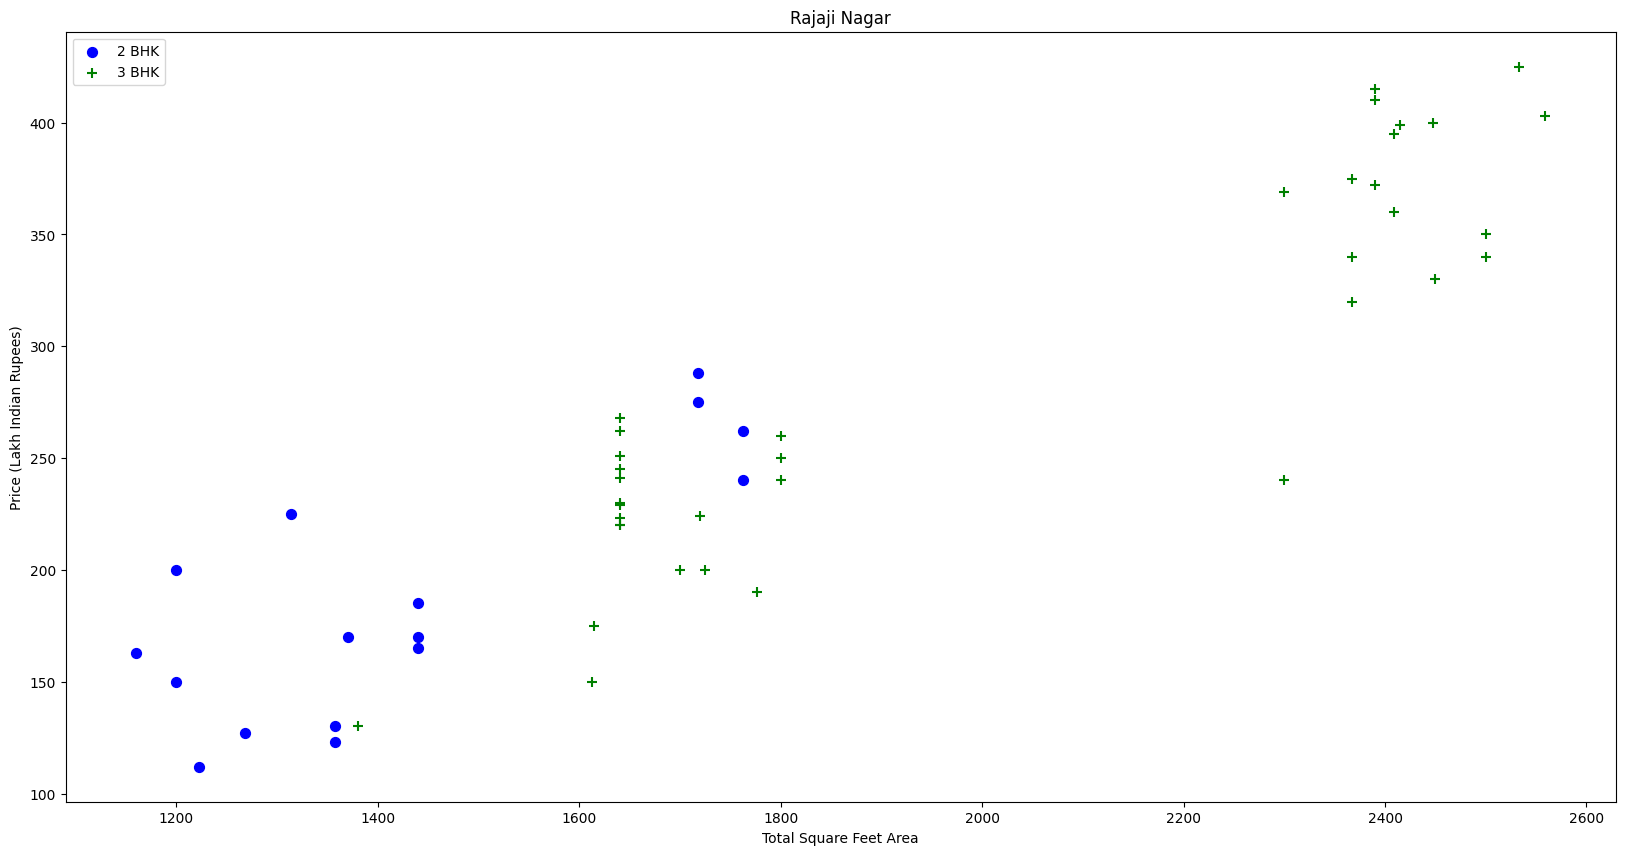

In [72]:
plot_scatter_chart(df3,"Rajaji Nagar")

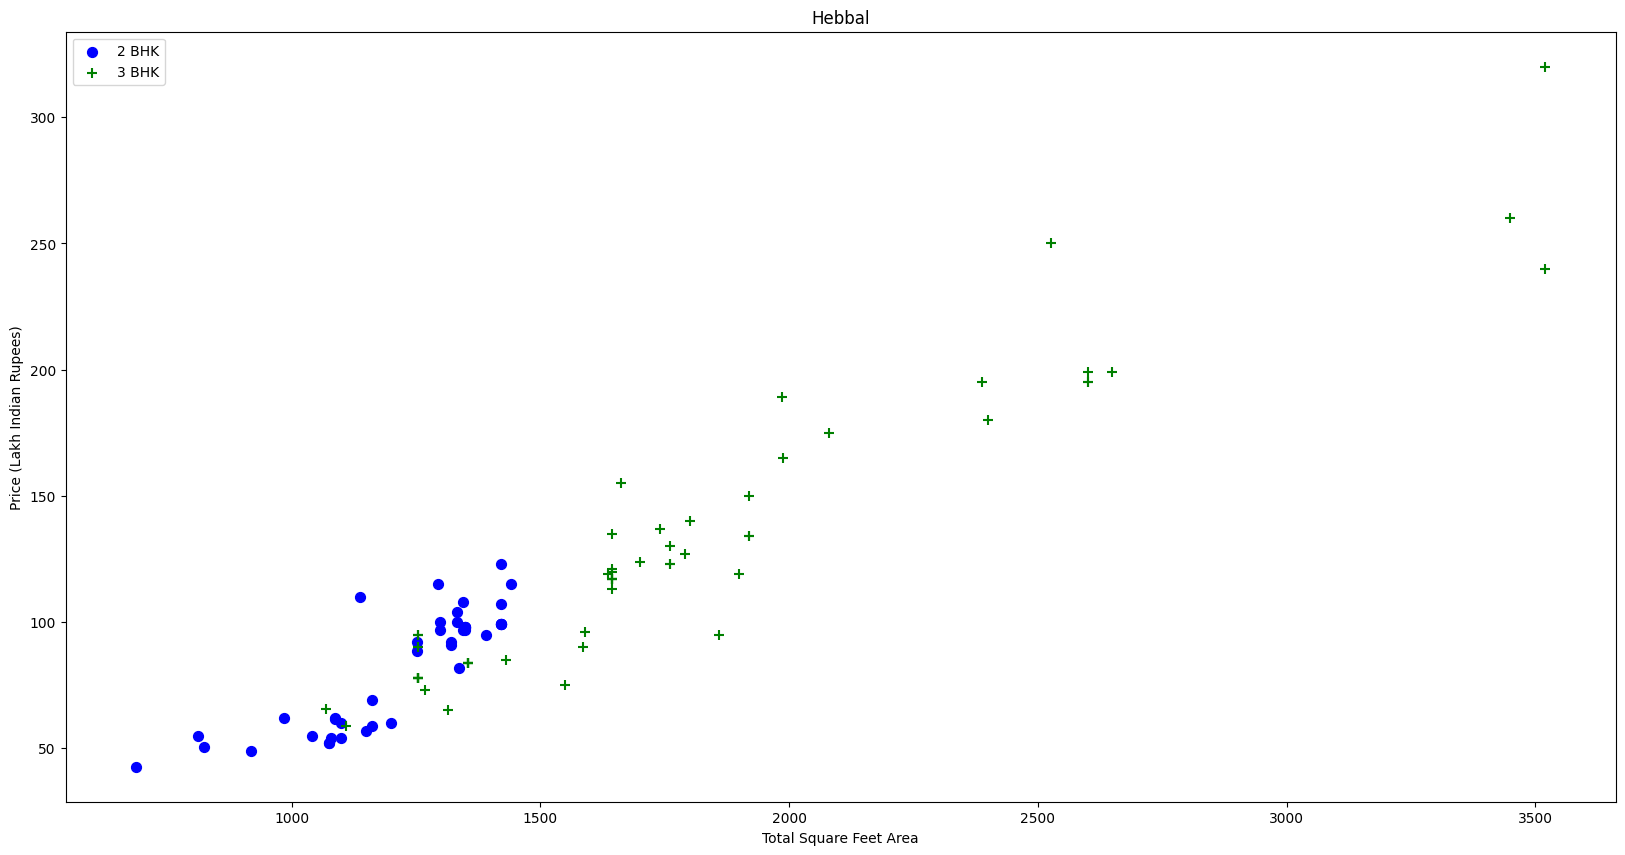

In [73]:
plot_scatter_chart(df3,"Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_m2 is less than mean price_per_m2 of 1 BHK apartment**

In [74]:
def remove_oda_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        oda_stats = {}
        for oda, oda_df in location_df.groupby('oda'):
            oda_stats[oda] = {
                'mean': np.mean(oda_df.price_per_m2),
                'std': np.std(oda_df.price_per_m2),
                'count': oda_df.shape[0]
            }
        for oda, oda_df in location_df.groupby('oda'):
            stats = oda_stats.get(oda-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, oda_df[oda_df.price_per_m2<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [75]:
df3.shape

(9898, 8)

In [76]:
df4 = remove_oda_outliers(df3)
df4.shape

(7054, 8)

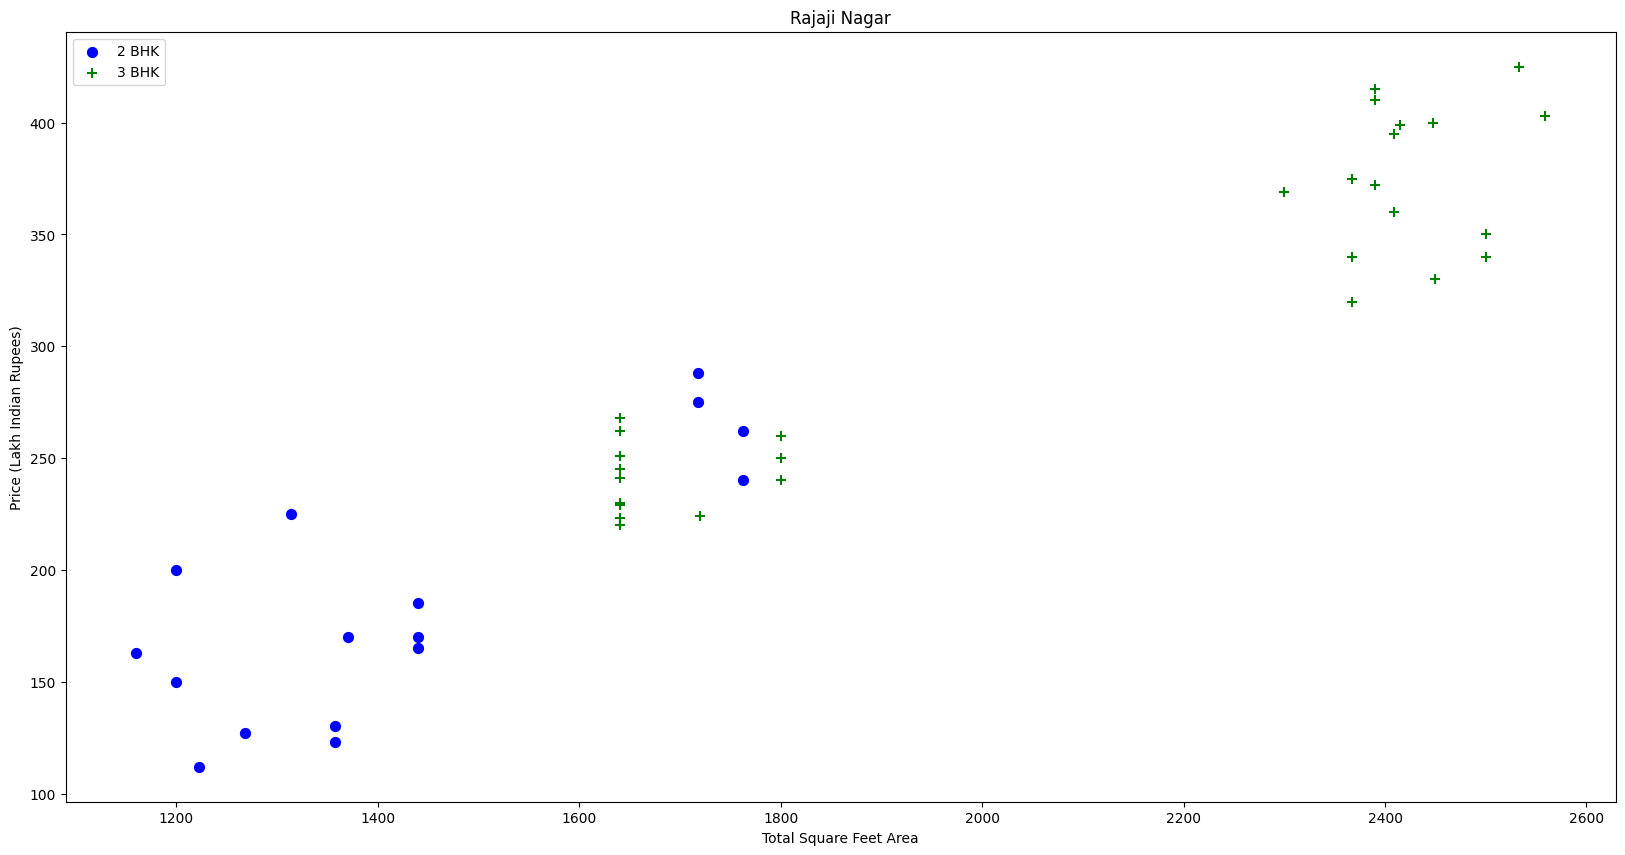

In [77]:
plot_scatter_chart(df4,"Rajaji Nagar")

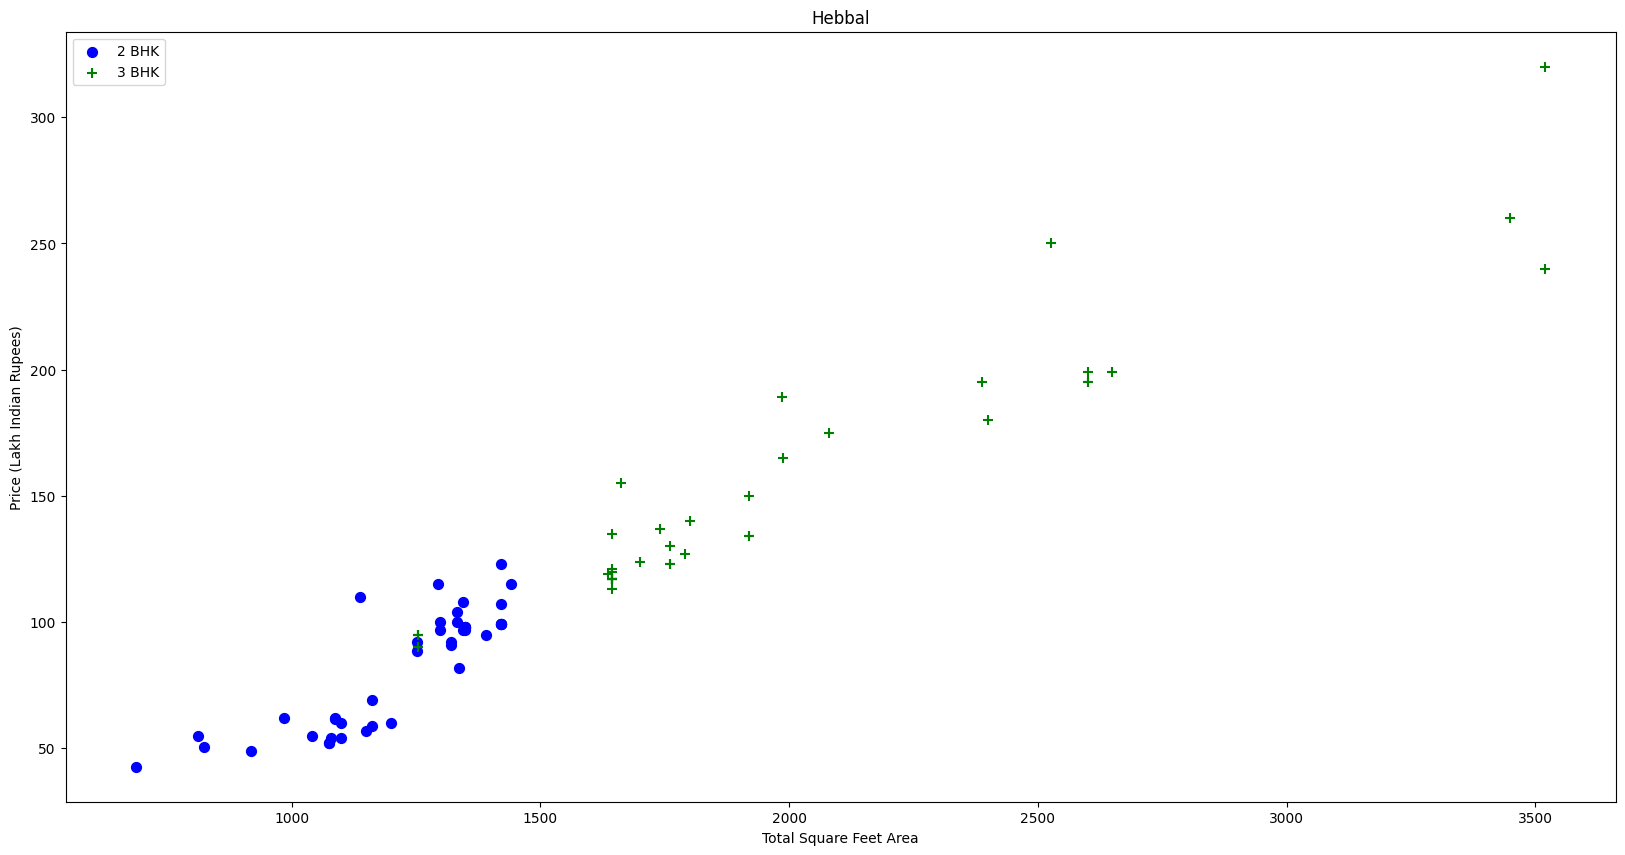

In [78]:
plot_scatter_chart(df4,"Hebbal")

In [79]:
df4

,location,total_sqft,bath,balcony,price,oda,metrekare,price_per_m2
0,1st Block Jayanagar,2850.00,4.00,1.00,428.00,4,264.77,1616.48
1,1st Block Jayanagar,1630.00,3.00,2.00,194.00,3,151.43,1281.10
2,1st Block Jayanagar,1875.00,2.00,3.00,235.00,3,174.19,1349.08
3,1st Block Jayanagar,1200.00,2.00,0.00,130.00,3,111.48,1166.09
4,1st Block Jayanagar,1235.00,2.00,2.00,148.00,2,114.74,1289.93
...,...,...,...,...,...,...,...,...
9888,other,1155.00,2.00,1.00,64.00,2,107.30,596.44
9890,other,1200.00,2.00,3.00,70.00,2,111.48,627.90
9891,other,1800.00,1.00,1.00,200.00,1,167.23,1195.99
9894,other,1353.00,2.00,2.00,110.00,2,125.70,875.12


Text(0, 0.5, 'Count')

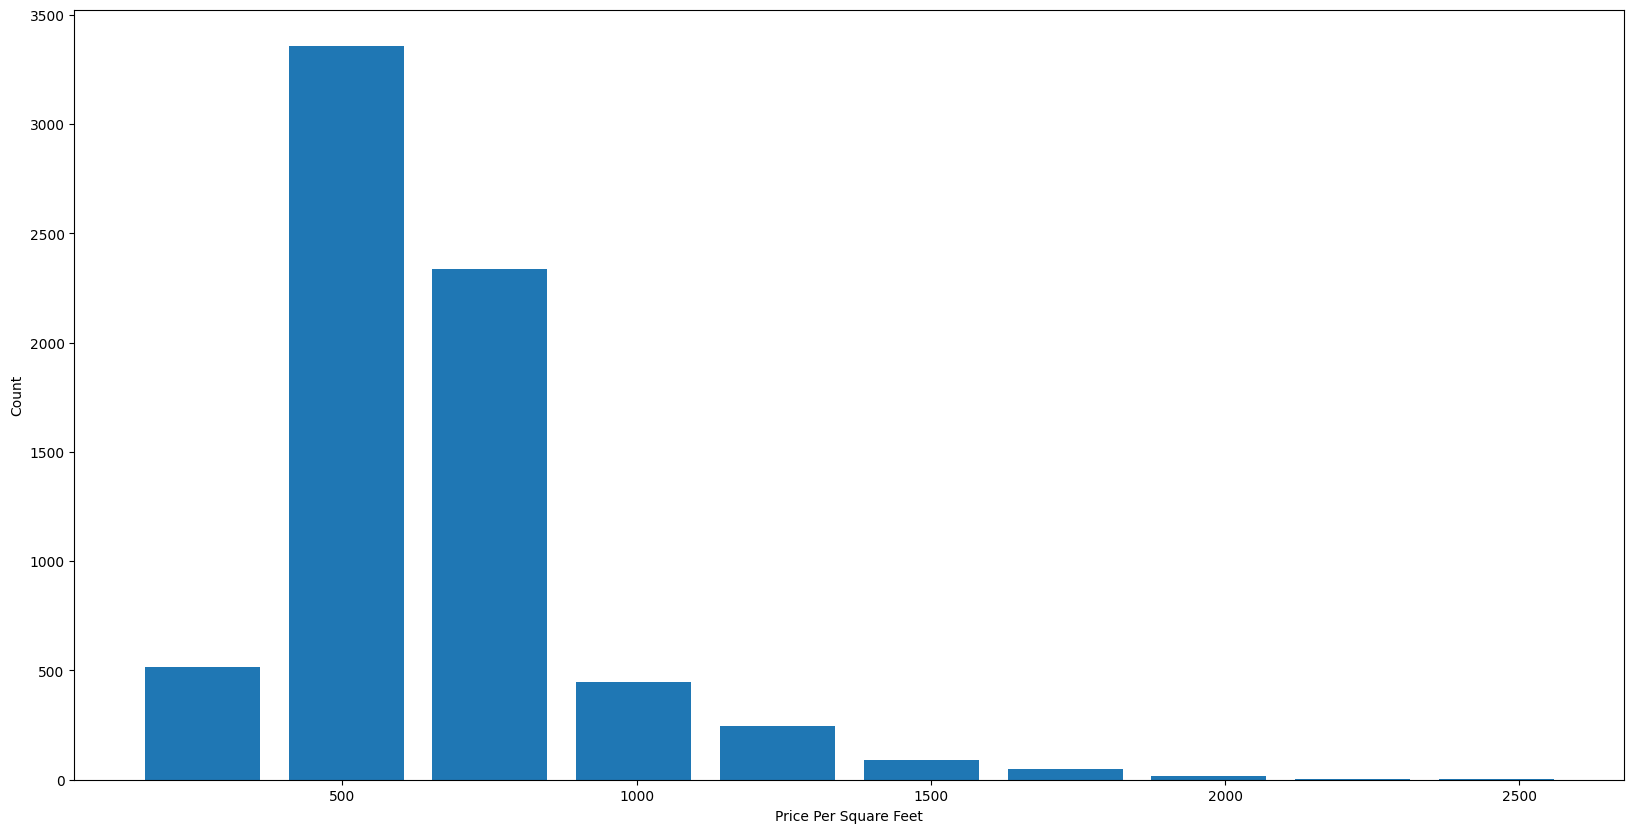

In [80]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_m2,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [81]:
df4.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

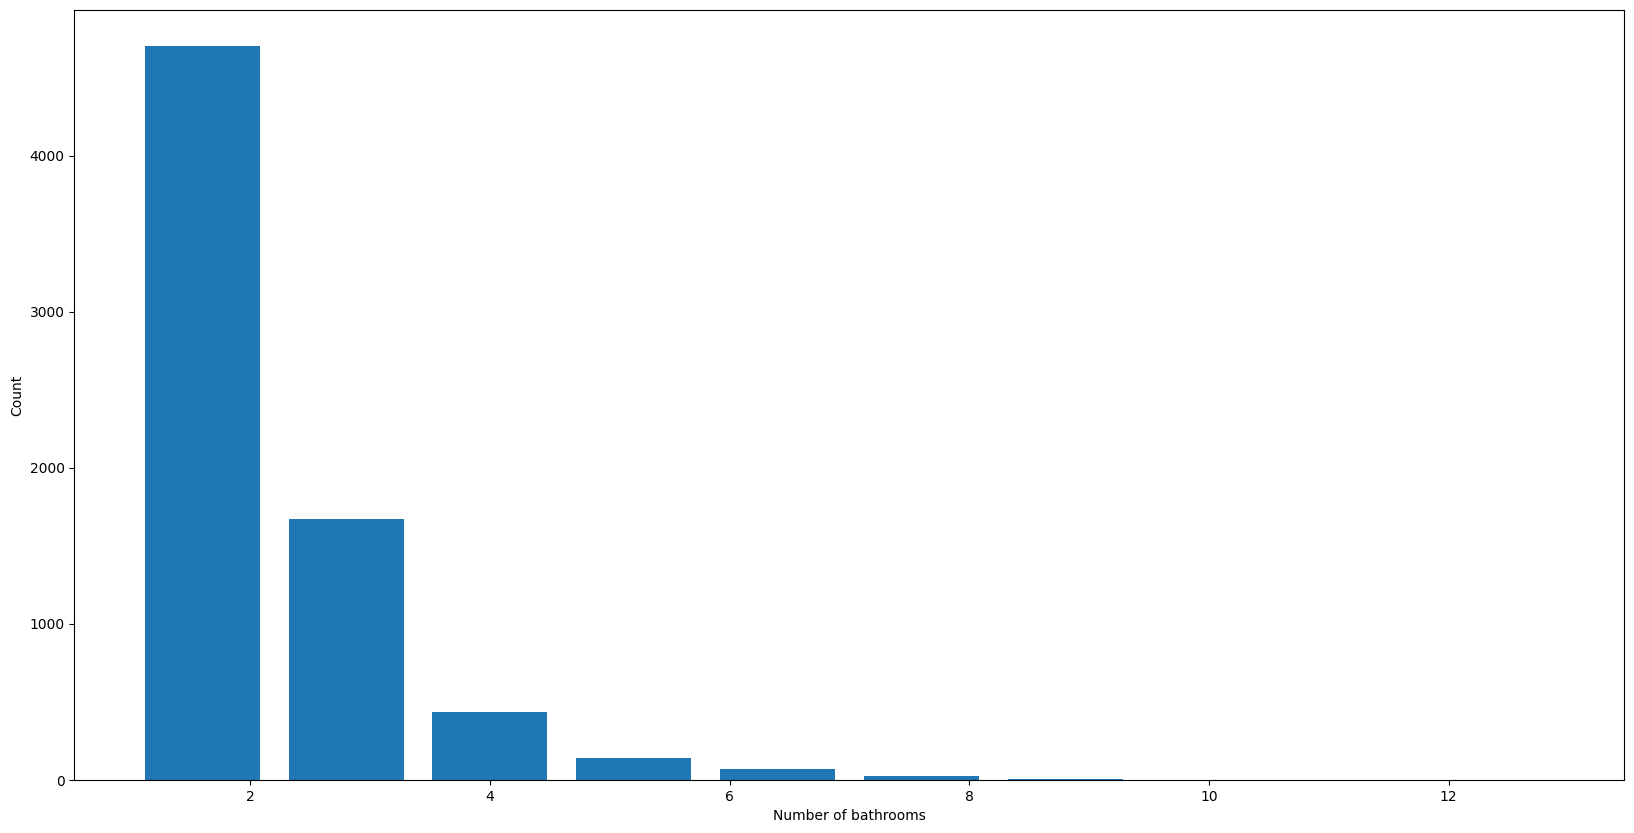

In [82]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [83]:
df4[df4.bath>10]

,location,total_sqft,bath,balcony,price,oda,metrekare,price_per_m2
9313,other,5425.00,13.00,0.00,275.00,13,504.00,545.64


In [84]:
df4[df4.bath>df4.oda+2]

,location,total_sqft,bath,balcony,price,oda,metrekare,price_per_m2
1551,Chikkabanavar,2460.00,7.00,2.00,80.00,4,228.54,350.05
6482,Thanisandra,1806.00,6.00,2.00,116.00,3,167.78,691.37
8128,other,11338.00,9.00,1.00,1000.00,6,1053.33,949.37


In [85]:
df5 = df4[df4.bath<df4.oda+2]
df5.shape

(6985, 8)

In [86]:
df5.head()

,location,total_sqft,bath,balcony,price,oda,metrekare,price_per_m2
0,1st Block Jayanagar,2850.00,4.00,1.00,428.00,4,264.77,1616.48
1,1st Block Jayanagar,1630.00,3.00,2.00,194.00,3,151.43,1281.10
2,1st Block Jayanagar,1875.00,2.00,3.00,235.00,3,174.19,1349.08
3,1st Block Jayanagar,1200.00,2.00,0.00,130.00,3,111.48,1166.09
4,1st Block Jayanagar,1235.00,2.00,2.00,148.00,2,114.74,1289.93


In [87]:
df5.shape

(6985, 8)

In [88]:
df6 = df5.drop(['balcony','price_per_m2','metrekare'],axis='columns')
df6.head(3)

,location,total_sqft,bath,price,oda
0,1st Block Jayanagar,2850.00,4.00,428.00,4
1,1st Block Jayanagar,1630.00,3.00,194.00,3
2,1st Block Jayanagar,1875.00,2.00,235.00,3


In [89]:
df6.rename(columns={'oda': 'bhk'},inplace=True, errors='raise')
df6.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.00,4.00,428.00,4
1,1st Block Jayanagar,1630.00,3.00,194.00,3
2,1st Block Jayanagar,1875.00,2.00,235.00,3


In [90]:
df6.shape

(6985, 5)

# Model Building

In [91]:
df6.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.00,4.00,428.00,4
1,1st Block Jayanagar,1630.00,3.00,194.00,3
2,1st Block Jayanagar,1875.00,2.00,235.00,3
3,1st Block Jayanagar,1200.00,2.00,130.00,3
4,1st Block Jayanagar,1235.00,2.00,148.00,2


In [92]:
df6.location = df6.location.str.lower().str.strip()

In [93]:
 pd.get_dummies(df6, drop_first=True, prefix='', prefix_sep='')

,total_sqft,bath,price,bhk,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.00,4.00,428.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.00,3.00,194.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.00,2.00,235.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.00,2.00,130.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.00,2.00,148.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,1155.00,2.00,64.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9890,1200.00,2.00,70.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9891,1800.00,1.00,200.00,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9894,1353.00,2.00,110.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [94]:
df7 = pd.get_dummies(df6, drop_first=True, prefix='', prefix_sep='')
df7.head()

,total_sqft,bath,price,bhk,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.00,4.00,428.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.00,3.00,194.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.00,2.00,235.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.00,2.00,130.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.00,2.00,148.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
df7.shape

(6985, 239)

In [96]:
X = df7.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.00,4.00,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.00,3.00,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.00,2.00,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
y = df7.price
y.head(3)

0   428.00
1   194.00
2   235.00
Name: price, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [100]:
X_train.values

array([[1200.0, 2.0, 2, ..., False, False, False],
       [1280.0, 3.0, 3, ..., False, False, False],
       [1500.0, 2.0, 3, ..., False, False, False],
       ...,
       [708.0, 1.0, 2, ..., False, False, False],
       [1200.0, 2.0, 2, ..., False, False, False],
       [1800.0, 1.0, 2, ..., False, False, False]], dtype=object)

In [101]:
y_train

6552    79.55
1261    50.00
991     70.00
5311    53.50
4659    60.00
        ...  
1428    11.66
4305    58.00
1635    40.00
5726    46.00
1562   128.00
Name: price, Length: 5588, dtype: float64

In [102]:
lr_clf = LinearRegression()
lr_clf.fit(X_train.values,y_train)
lr_clf.score(X_test.values,y_test)

0.859159176202822

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [103]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

s = cross_val_score(LinearRegression(), X, y, cv=cv)
average = np.average(s)
average

0.8500691052651781

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:blue'>Find best model using GridSearchCV</h2>

In [104]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.85,{}
1,lasso,0.70,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.82,"{'criterion': 'poisson', 'splitter': 'random'}"


**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**

<h2 style='color:blue'>Test the model for few properties</h2>

In [105]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st phase jp nagar',
       '2nd phase judicial layout', '2nd stage nagarbhavi',
       '5th phase jp nagar', '6th phase jp nagar', '7th phase jp nagar',
       '8th phase jp nagar',
       ...
       'vijayanagar', 'vishveshwarya layout', 'vishwapriya layout',
       'vittasandra', 'whitefield', 'yelachenahalli', 'yelahanka',
       'yelahanka new town', 'yelenahalli', 'yeshwanthpur'],
      dtype='object', length=238)

In [106]:
def predict_price(location,sqft,bath,bhk):
    location = str(location).lower().strip()
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    #print(x)

    return lr_clf.predict([x])[0]

In [107]:
np.where(X.columns=='1st phase jp nagar')[0][0]

3

In [108]:
np.zeros(len(X.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [109]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

94.97678134746545

In [110]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

95.83000487173985

In [111]:
predict_price('Indira Nagar',1000, 2, 2)

145.46472934596244

In [112]:
predict_price('Indira Nagar',1000, 3, 3)

146.31795287023684

<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [113]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

<h2 style='color:blue'>Export location and column information to a file that will be useful later on in our prediction application</h2>

In [114]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [115]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st phase jp nagar',
       '2nd phase judicial layout', '2nd stage nagarbhavi',
       '5th phase jp nagar', '6th phase jp nagar', '7th phase jp nagar',
       '8th phase jp nagar',
       ...
       'vijayanagar', 'vishveshwarya layout', 'vishwapriya layout',
       'vittasandra', 'whitefield', 'yelachenahalli', 'yelahanka',
       'yelahanka new town', 'yelenahalli', 'yeshwanthpur'],
      dtype='object', length=238)